In [1]:
import sys
print("Python Version:",sys.version)

Python Version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [5]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


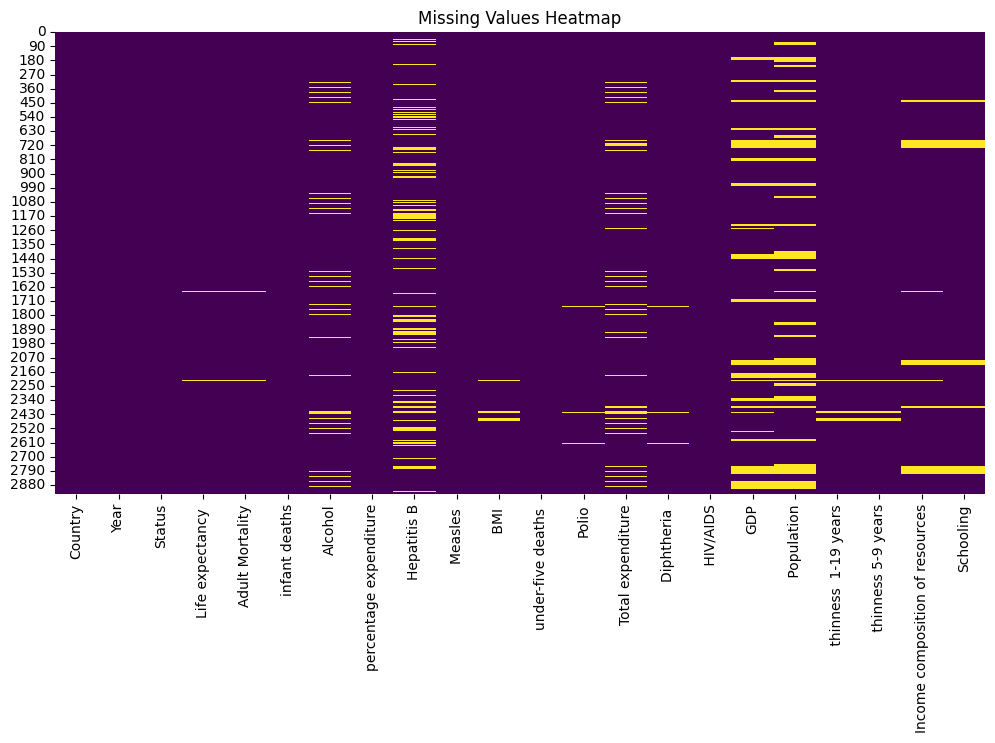

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv("dataset.csv")

# Verificar informações gerais
df.info()

# Estatísticas descritivas
display(df.describe())

# Visualização de valores ausentes
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [7]:
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_percent


,0
Population,22.191967
Hepatitis B,18.822328
GDP,15.248468
Total expenditure,7.692308
Alcohol,6.603131
Income composition of resources,5.684139
Schooling,5.547992
thinness 1-19 years,1.157250
thinness 5-9 years,1.157250
BMI,1.157250


In [9]:
# Corrigindo nomes com espaços duplos
df.columns = df.columns.str.strip()  # Remove espaços extras no início/fim
df.columns = df.columns.str.replace("  ", " ", regex=False)  # Corrige espaços duplicados no meio

# Preencher com mediana (robusta a outliers)
cols_mediana = ['Total expenditure', 'Schooling']
for col in cols_mediana:
    df[col] = df[col].fillna(df[col].median())

# Preencher com média (distribuições mais simétricas)
cols_media = ['Alcohol', 'Income composition of resources', 'thinness 1-19 years',
              'thinness 5-9 years', 'BMI', 'Diphtheria', 'Polio', 'GDP']
for col in cols_media:
    df[col] = df[col].fillna(df[col].mean())

# Preencher com média/mediana por país
df['Population'] = df.groupby('Country')['Population'].transform(lambda x: x.fillna(x.median()))
df['Hepatitis B'] = df.groupby('Country')['Hepatitis B'].transform(lambda x: x.fillna(x.mean()))

# Preencher variáveis-alvo
df['Life expectancy'] = df['Life expectancy'].fillna(df['Life expectancy'].mean())
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())

# Verificar se ainda há nulos
df.isnull().sum().sort_values(ascending=False)


,0
Population,648
Hepatitis B,144
Status,0
Life expectancy,0
Country,0
Year,0
infant deaths,0
Adult Mortality,0
percentage expenditure,0
Alcohol,0


In [10]:
# Preencher os casos restantes com mediana global (fallback)
df['Population'] = df['Population'].fillna(df['Population'].median())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())


In [11]:
df.isnull().sum().sort_values(ascending=False)


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


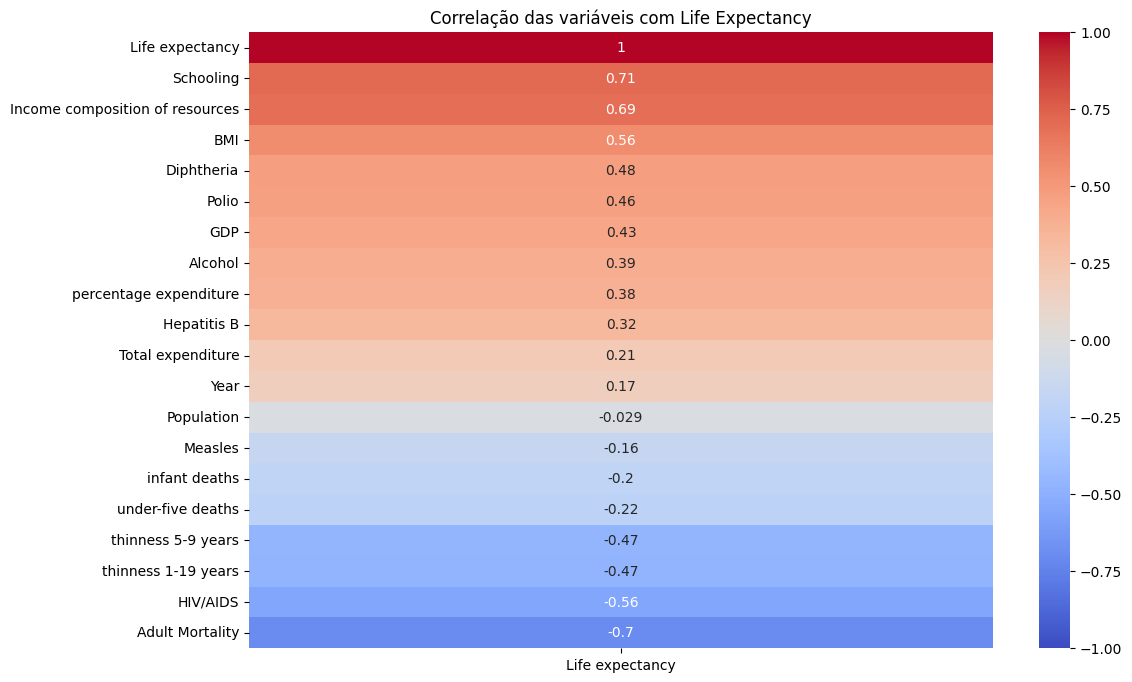

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlação (somente colunas numéricas)
corr = df.corr(numeric_only=True)

# Visualizar a correlação com a variável alvo
plt.figure(figsize=(12,8))
sns.heatmap(corr[['Life expectancy']].sort_values(by='Life expectancy', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlação das variáveis com Life Expectancy")
plt.show()


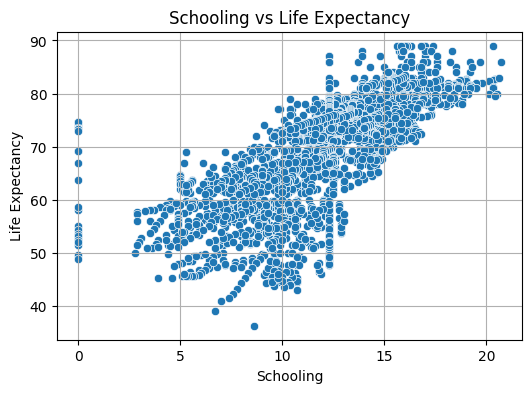

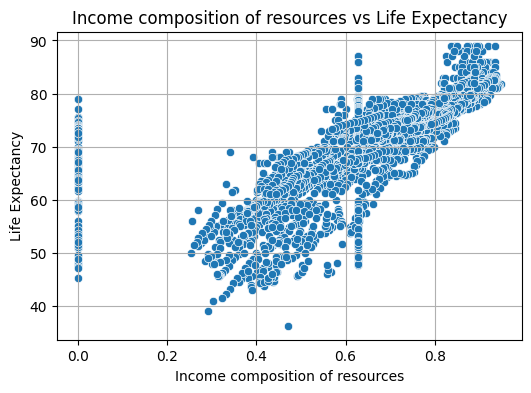

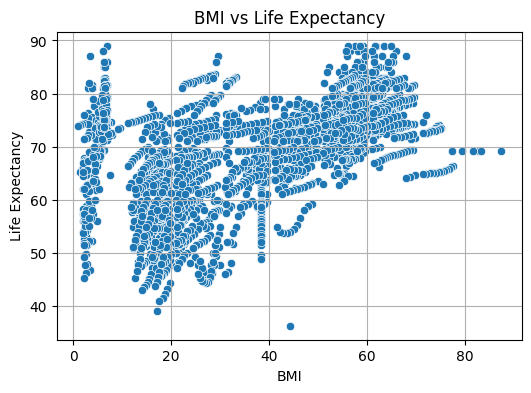

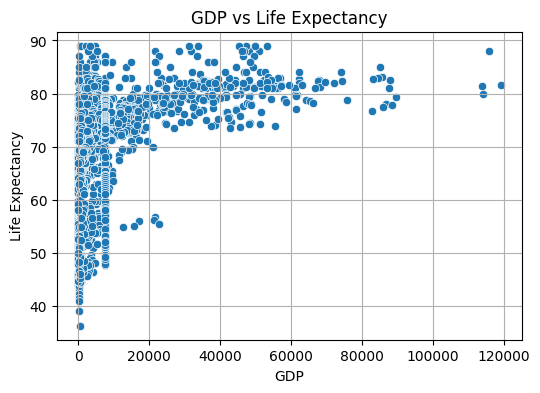

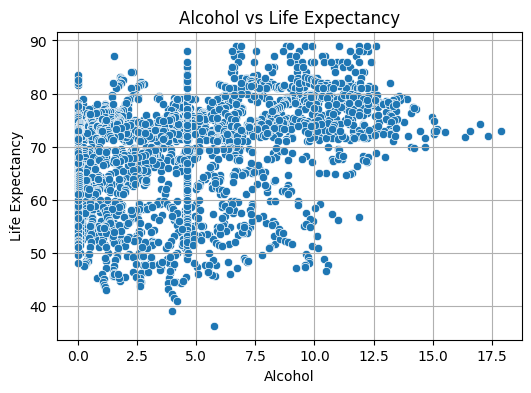

In [13]:
# Scatterplot entre variáveis mais correlacionadas e a expectativa de vida
top_features = ['Schooling', 'Income composition of resources', 'BMI', 'GDP', 'Alcohol']

for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['Life expectancy'])
    plt.title(f"{feature} vs Life Expectancy")
    plt.xlabel(feature)
    plt.ylabel("Life Expectancy")
    plt.grid(True)
    plt.show()


In [14]:
# Lista de features selecionadas com base na análise de correlação
selected_features = [
    'Schooling',
    'Income composition of resources',
    'BMI',
    'Diphtheria',
    'Polio',
    'GDP',
    'Alcohol',
    'Adult Mortality',
    'HIV/AIDS',
    'thinness 1-19 years',
    'thinness 5-9 years',
    'infant deaths',
    'under-five deaths',
    'Status'  # variável categórica (Developed/Developing)
]


In [15]:
target = 'Life expectancy'


In [16]:
# 1. Seleção das melhores features
selected_features = [
    'Schooling',
    'Income composition of resources',
    'BMI',
    'Diphtheria',
    'Polio',
    'GDP',
    'Alcohol',
    'Adult Mortality',
    'HIV/AIDS',
    'thinness 1-19 years',
    'thinness 5-9 years',
    'infant deaths',
    'under-five deaths',
    'Status'
]

target = 'Life expectancy'

# 2. Encoding da variável categórica
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

# 3. Separar variáveis preditoras e alvo
X = df[selected_features]
y = df[target]

# 4. Visualizar as dimensões finais
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (2938, 14)
Shape de y: (2938,)


In [17]:
from sklearn.model_selection import train_test_split

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mostrar shapes para verificar
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2350, 14)
X_test shape: (588, 14)
y_train shape: (2350,)
y_test shape: (588,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Instanciar e treinar o modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_lr = lr_model.predict(X_test)

# 3. Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

# 4. Exibir os resultados
print("📊 Regressão Linear")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))


📊 Regressão Linear
MAE: 2.86
RMSE: 3.91
R²: 0.824


In [19]:
from sklearn.ensemble import RandomForestRegressor

# 1. Instanciar o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Treinar o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# 4. Avaliar o modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# 5. Exibir os resultados
print("🌳 Random Forest Regressor")
print("MAE:", round(mae_rf, 2))
print("RMSE:", round(rmse_rf, 2))
print("R²:", round(r2_rf, 4))


🌳 Random Forest Regressor
MAE: 1.07
RMSE: 1.66
R²: 0.968


In [20]:
!pip install xgboost


In [21]:
from xgboost import XGBRegressor

# 1. Instanciar o modelo
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# 2. Treinar o modelo
xgb_model.fit(X_train, y_train)

# 3. Previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# 4. Avaliação
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# 5. Exibir os resultados
print("⚡ XGBoost Regressor")
print("MAE:", round(mae_xgb, 2))
print("RMSE:", round(rmse_xgb, 2))
print("R²:", round(r2_xgb, 4))


⚡ XGBoost Regressor
MAE: 1.11
RMSE: 1.67
R²: 0.9677


🎯 Top 10 Features mais importantes para o Random Forest:
                            Feature  Importance
8                          HIV/AIDS    0.595646
7                   Adult Mortality    0.164183
1   Income composition of resources    0.145662
0                         Schooling    0.019689
2                               BMI    0.016424
12                under-five deaths    0.012232
10               thinness 5-9 years    0.009972
6                           Alcohol    0.009458
9               thinness 1-19 years    0.007013
5                               GDP    0.005623


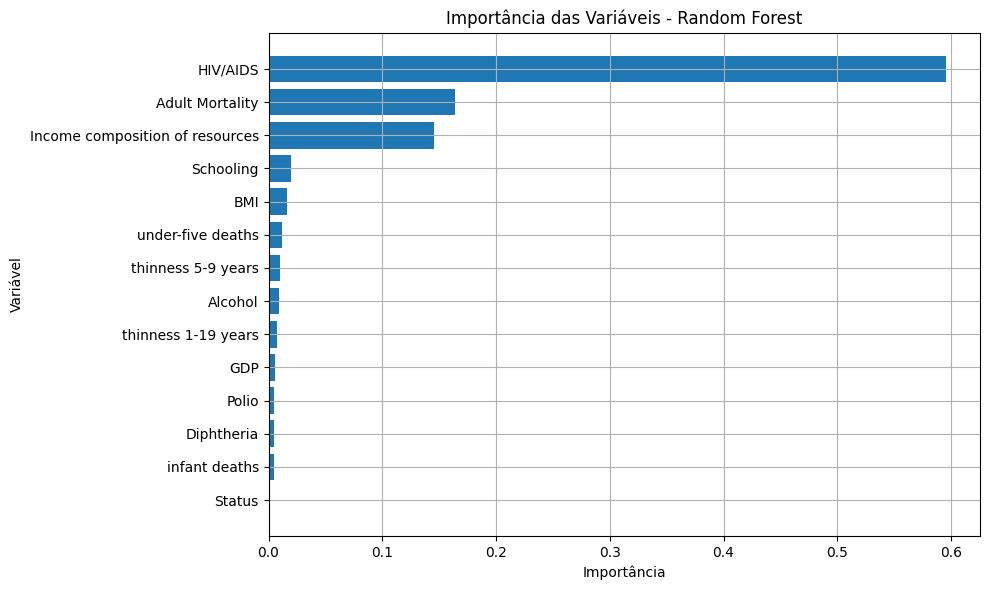

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Obter a importância de cada feature
importances = rf_model.feature_importances_

# Criar DataFrame com os nomes das features e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibir as 10 mais importantes
print("🎯 Top 10 Features mais importantes para o Random Forest:")
print(feature_importance_df.head(10))

# Visualizar em gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Top 10 maiores erros do Random Forest:


,Country,Year,Status,Real,Previsto,Erro Absoluto
2395,South Africa,2013,0,69.0,58.583,10.417
881,Estonia,2000,0,78.0,68.448,9.552
2922,Zimbabwe,2015,0,67.0,58.870,8.130
2779,United Republic of Tanzania,2014,0,67.0,59.262,7.738
937,France,2008,0,89.0,81.398,7.602
759,Djibouti,2009,0,69.0,61.407,7.593
1055,Grenada,2002,0,79.0,73.034,5.966
2434,Spain,2006,1,88.0,82.067,5.933
1916,Norway,2009,1,89.0,83.560,5.440
2763,United Kingdom of Great Britain and Northern I...,2014,1,81.0,86.233,5.233


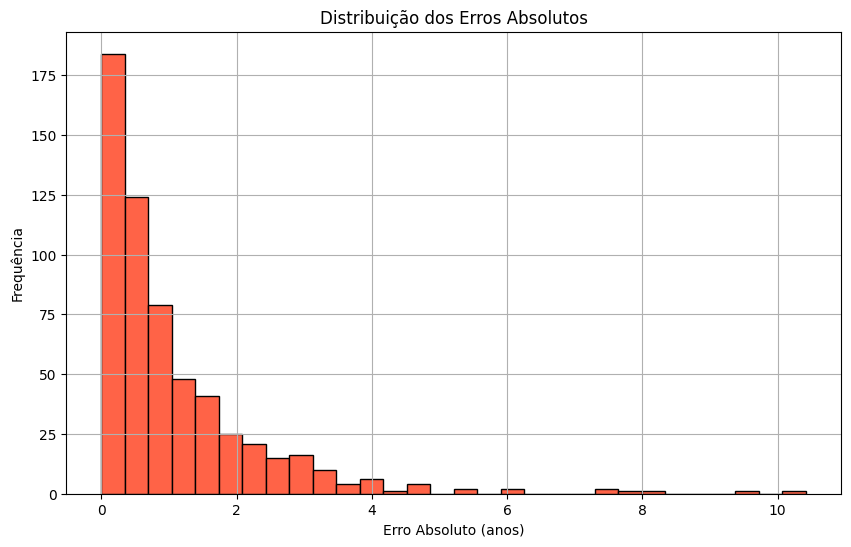

In [23]:
# Criar DataFrame com valores reais, previstos e erro absoluto
erros_df = pd.DataFrame({
    'Country': df.loc[X_test.index, 'Country'],
    'Year': df.loc[X_test.index, 'Year'],
    'Status': df.loc[X_test.index, 'Status'],
    'Real': y_test,
    'Previsto': y_pred_rf,
})
erros_df['Erro Absoluto'] = abs(erros_df['Real'] - erros_df['Previsto'])

# Ordenar do maior para o menor erro
erros_ordenados = erros_df.sort_values(by='Erro Absoluto', ascending=False)

# Exibir os 10 maiores erros
print("🔍 Top 10 maiores erros do Random Forest:")
display(erros_ordenados.head(10))

# Visualização dos erros absolutos
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(erros_df['Erro Absoluto'], bins=30, color='tomato', edgecolor='black')
plt.title('Distribuição dos Erros Absolutos')
plt.xlabel('Erro Absoluto (anos)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [24]:
import joblib

# Salvar o modelo treinado
joblib.dump(rf_model, 'modelo_random_forest.pkl')

# (opcional) salvar também os dados de treino/teste ou escaladores se usados
# joblib.dump(X_train, 'X_train.pkl')
# joblib.dump(y_train, 'y_train.pkl')

print("✅ Modelo salvo como 'modelo_random_forest.pkl'")


✅ Modelo salvo como 'modelo_random_forest.pkl'


In [25]:
from google.colab import files
files.download('modelo_random_forest.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>